In [1]:
#import statements
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import pysm3
import pysm3.units as u
import warnings
warnings.filterwarnings("ignore")

In [2]:
#function that takes in frequency and makes a map
def make_map(freq):
    return sky.get_emission(freq * u.GHz) 

In [3]:
#function that takes in a map, the map_150, and  and outputs rbb80 value
def rbb80(map2, map_150, clbb1x1):
    clbb1x2 = hp.anafast(map_150GHz, map2)[2][80]
    clbb2x2 = hp.anafast(map2)[2][80]
    return clbb1x2/(np.sqrt(clbb1x1*clbb2x2))

In [4]:
#function that takes in an array of (1-rBB[80]) values with the corresponding model number and plots
#a log log graph against frequency
def loglog_rbb(rbb_vals, i):
    plt.plot(freqs, rbb_vals, label= 'd'+str(i)) 
    plt.xscale('log')
    plt.xlabel("frequency")
    plt.yscale('log')
    plt.ylabel("1 - rBB[80]")
    plt.legend()
    plt.title("rBB as a function of frequency (log-log plot)")

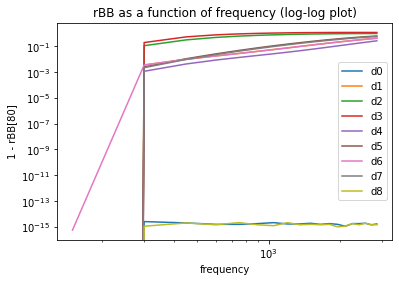

In [6]:
freqs = np.arange(150,3000,150)
rbb80_vals = np.ones_like(freqs)*1.
#for all of the models
for i in range(9):
    #make a sky
    sky = pysm3.Sky(nside=128, preset_strings=["d"+str(i)])
    #make 150GHz map, compute it's bbl80 value
    map_150GHz = sky.get_emission(150 * u.GHz)
    clbb1x1 = hp.anafast(map_150GHz)[2][80]
    #compute RlBB[80] for every 150GHz from 150GHz to 3THz
    for j, freq in enumerate(freqs):
        rbb80_vals[j] = (1 - rbb80(make_map(freq), map_150GHz, clbb1x1))
    loglog_rbb(rbb80_vals, i)